In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [12]:
# Paths to your CSV files
data_paths = [
    r'C:\Users\Acer\Desktop\Manuscript edited plots\Gyawaliko kam\SMAP.csv',
    r'C:\Users\Acer\Desktop\Manuscript edited plots\Gyawaliko kam\SMOS.csv',
    r'C:\Users\Acer\Desktop\Manuscript edited plots\Gyawaliko kam\GLDAS 2.1.csv',
    r'C:\Users\Acer\Desktop\Manuscript edited plots\Gyawaliko kam\FLDAS.csv'
]

In [13]:
# List to store dataframes
dataframes = []

In [14]:
# Read each CSV file into a dataframe and append to the list
for path in data_paths:
    df = pd.read_csv(path)
    df['Date'] = pd.to_datetime(df['Date'])  # Ensure 'Date' column is datetime
    dataframes.append(df)

In [16]:
dataframes[3]

,Date,SM_hilly,SM_himal,SM_terai
0,2015-04-01,0.297147,0.269977,0.244765
1,2015-05-01,0.294744,0.284267,0.243902
2,2015-06-01,0.293797,0.278940,0.265528
3,2015-07-01,0.392279,0.320717,0.382136
4,2015-08-01,0.417115,0.357265,0.408853
...,...,...,...,...
64,2020-08-01,0.415518,0.339767,0.416925
65,2020-09-01,0.419073,0.344857,0.422928
66,2020-10-01,0.363792,0.295351,0.378210
67,2020-11-01,0.298245,0.267576,0.293738


In [17]:
station_numbers = ['SMAP', 'SMOS', 'GLDAS 2.1','FLDAS']

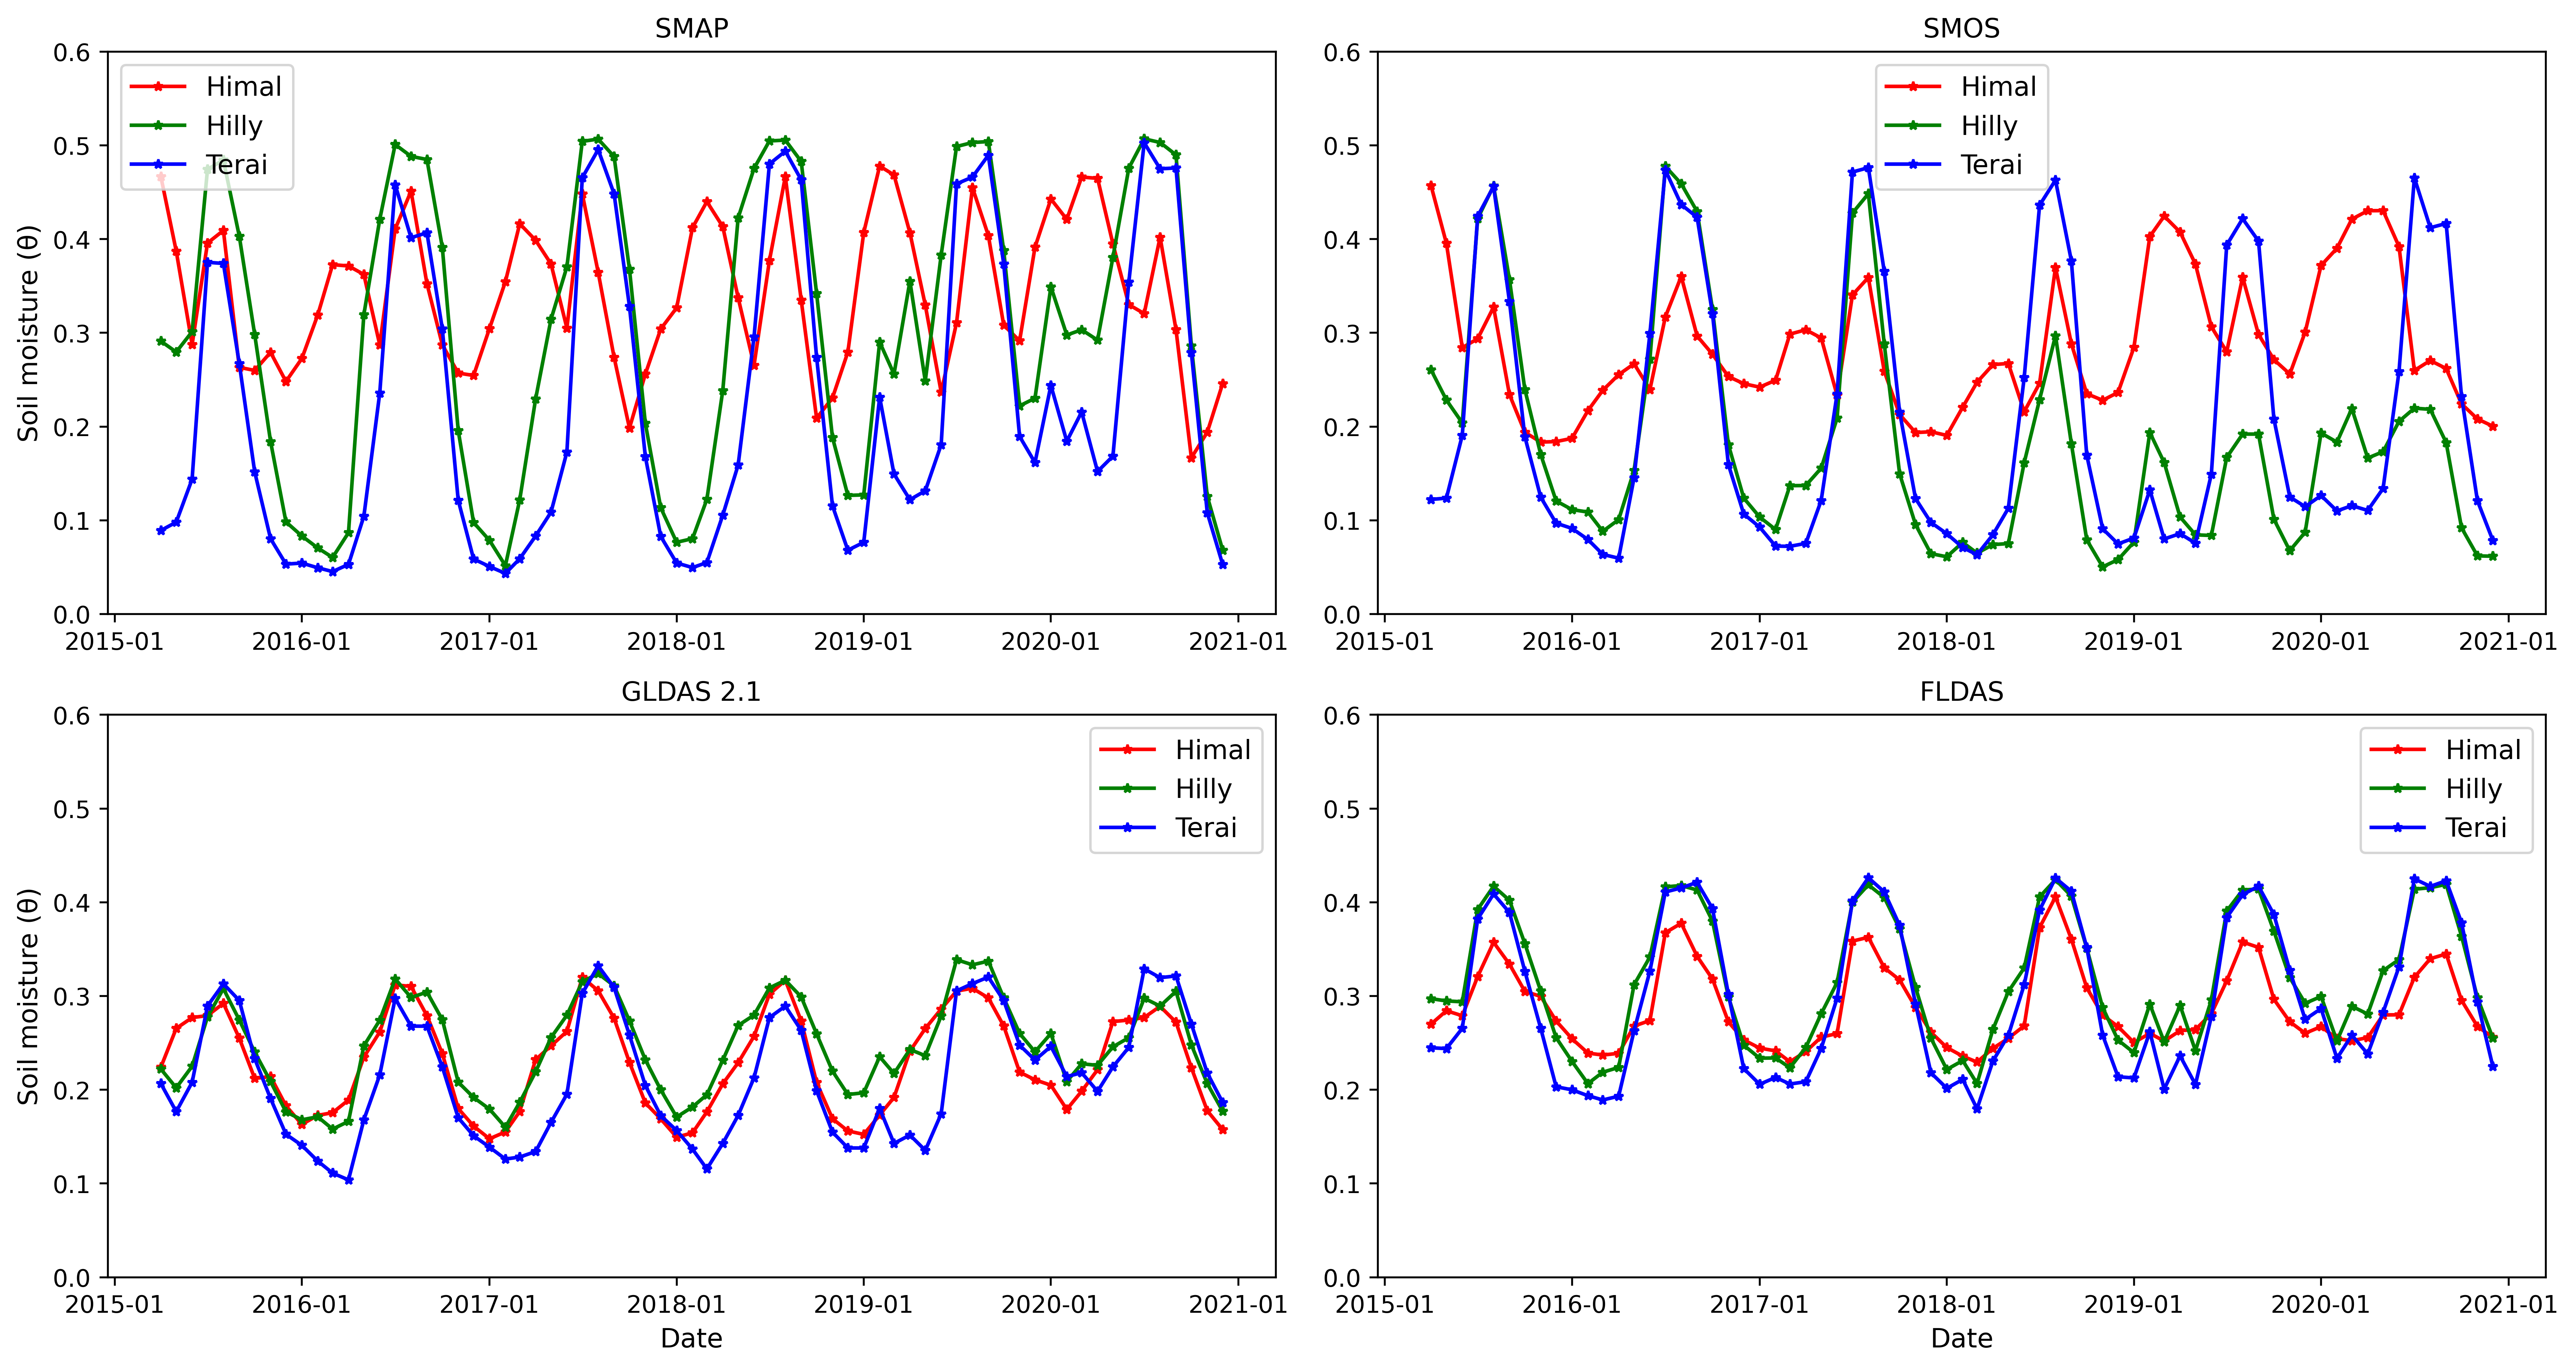

In [23]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8), dpi=500)
# Plotting data on each subplot
for idx, df in enumerate(dataframes):
    # Determine row location
    row = idx // 2
    col = idx % 2
    # Plot SMAP
    
    axes[row, col].plot(df['Date'], df['SM_himal'], color='r', marker = '*', markersize='4', label='Himal')
    axes[row, col].plot(df['Date'], df['SM_hilly'], color='g', marker = '*', markersize='4', label='Hilly')
    axes[row, col].plot(df['Date'], df['SM_terai'], color='b', marker = '*', markersize='4', label='Terai')
    axes[row, col].set_title(f'{station_numbers[idx]}', fontsize=11)
        #axes[row, col].set_title('SMAP', fontsize=11)
    #axes[row, col].set_ylabel('Soil moisture(θ)', fontsize=11)
        # Set y-axis label only for the left column
    if col == 0:
        axes[row, col].set_ylabel('Soil moisture (θ)', fontsize=11)
    
    # Set x-axis label only for the bottom row
    if row == 1:
        axes[row, col].set_xlabel('Date', fontsize=11)
    axes[row, col].xaxis.set_major_locator(mdates.YearLocator())
    axes[row, col].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    axes[row,col].set_ylim(0, 0.6)
    axes[row, col].legend(fontsize=11)

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig(r'C:\Users\Acer\Desktop\Manuscript edited plots\SM.png', dpi=500, bbox_inches='tight')

# Show the plot
plt.show()